# Exercise 8
### Jan Kesting, Felix Fleischle - 23.6.2023 - Group 1 Jeong Yun Choi

#### 1. Finding the fixed points
The two trivial fixed points are $N_i=0$, $P_i=0\, \forall i$ <br />
and $N_i = a_i$, $P_i=0\, \forall i$ <br />
The non-trivial fixed point is $N_i=1\, \forall i$, $P_i=1\, \forall i$, since the coefficients $b_{ij}$ and $c_{ij}$ are chosen such that $\sum_j b_{1j} = a_j -1 $ etc.
#### 2. Finding the jacobi matrix
To find the jacobi matrix, we have to take the derivative of all $N_i$ and $P_i$ with respect to all $N_i$ and $P_i$. <br />
We can see that $\frac{\partial N_i}{\partial N_j} = -\delta_{ij}$ and $\frac{\partial P_i}{\partial P_j} = 0$ <br />
The other derivatives are $\frac{\partial N_i}{\partial P_j} = -b_{ij}$ and $\frac{\partial P_i}{\partial N_j} = c_{ij}$. <br />
This results in the jacobi matrix seen two cells below

#### 3. Determining eigenvalues and eigenvectors and plotting the time evolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

In [2]:
# Entering the jacobi matrix A into python
A = np.array([[-1, 0, 0, -2, -3, -5],
              [0, -1, 0, -1, -3, -7],
              [0, 0, -1, -4, -3, -2], 
              [2, 3, 3, 0, 0, 0],
              [1, 3, 7, 0, 0, 0],
              [4, 3, 2, 0, 0, 0]
             ]
            )

In [3]:
# Computing the eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(A)

In [4]:
print("Eigenvalues:", eigenvalues)

Eigenvalues: [-0.5       +9.61937514j -0.5       -9.61937514j -0.5       +1.94934965j
 -0.5       -1.94934965j -0.78695323+0.j         -0.21304677+0.j        ]


In [5]:
print("Eigenvectors:", eigenvectors)

Eigenvectors: [[ 0.41671061+2.57614202e-16j  0.41671061-2.57614202e-16j
   0.02061383-8.03671272e-02j  0.02061383+8.03671272e-02j
   0.17400278+0.00000000e+00j -0.05594659+0.00000000e+00j]
 [ 0.46255725+0.00000000e+00j  0.46255725-0.00000000e+00j
   0.10446298-4.07269750e-01j  0.10446298+4.07269750e-01j
  -0.46845826+0.00000000e+00j  0.15062197+0.00000000e+00j]
 [ 0.36582426+1.37268653e-16j  0.36582426-1.37268653e-16j
  -0.09748588+3.80068134e-01j -0.09748588-3.80068134e-01j
   0.25364448+0.00000000e+00j -0.08155354+0.00000000e+00j]
 [-0.0178836 -3.44058103e-01j -0.0178836 +3.44058103e-01j
  -0.12431792+5.50955060e-18j -0.12431792-5.50955060e-18j
   0.37668793+0.00000000e+00j -0.44737643+0.00000000e+00j]
 [-0.02352361-4.52564780e-01j -0.02352361+4.52564780e-01j
   0.69679678+0.00000000e+00j  0.69679678-0.00000000e+00j
  -0.69145068+0.00000000e+00j  0.82120692+0.00000000e+00j]
 [-0.02040346-3.92537035e-01j -0.02040346+3.92537035e-01j
  -0.40174501+3.64440453e-16j -0.40174501-3.64440453e

In [6]:
# Plotting and discussing the solutions for all 6 populations

# initial value:
v_0 = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

# First, find the coefficients such that v_0 = c_i * x_i with the eigenvectors x_i
coefficients = np.linalg.solve(eigenvectors, v_0)
print("Coefficients c:", coefficients)

# now, the time evolution is given as sum_i c_i e^(lambda_i tau) x_i
def v_tau(tau, coefficients, eigenvalues, eigenvectors):
    sum = 0
    for i in range(6):
        sum += coefficients[i] * np.exp(eigenvalues[i] * tau) * eigenvectors[i]
    return sum

Coefficients c: [ 0.12167073+1.31777980e-01j  0.12167073-1.31777980e-01j
  0.01232062-1.62579244e-02j  0.01232062+1.62579244e-02j
 -0.01095941+1.18846450e-17j -0.04663831-5.56371698e-18j]


In [7]:
# Computing v_tau manually, since simple numpy linspaces dont work here
tau = np.linspace(0, 10, 500)
v_evo = []
for tauitr in tau:
    res = abs( v_tau(tauitr, coefficients, eigenvalues, eigenvectors) )
    v_evo.append(res)
    
v_evo = np.asarray(v_evo)
print(v_evo)

[[0.11826375 0.11137468 0.06746098 0.0743066  0.0925417  0.0347092 ]
 [0.09318619 0.08813399 0.05860608 0.06913491 0.1018417  0.03765167]
 [0.06560781 0.06357228 0.05079746 0.06501255 0.10850204 0.03967865]
 ...
 [0.00218012 0.00230005 0.00188862 0.00242367 0.00121591 0.0015579 ]
 [0.00221856 0.00231619 0.00194207 0.00235066 0.0011218  0.00153311]
 [0.00225054 0.00232436 0.00200418 0.00227227 0.00104442 0.00151305]]


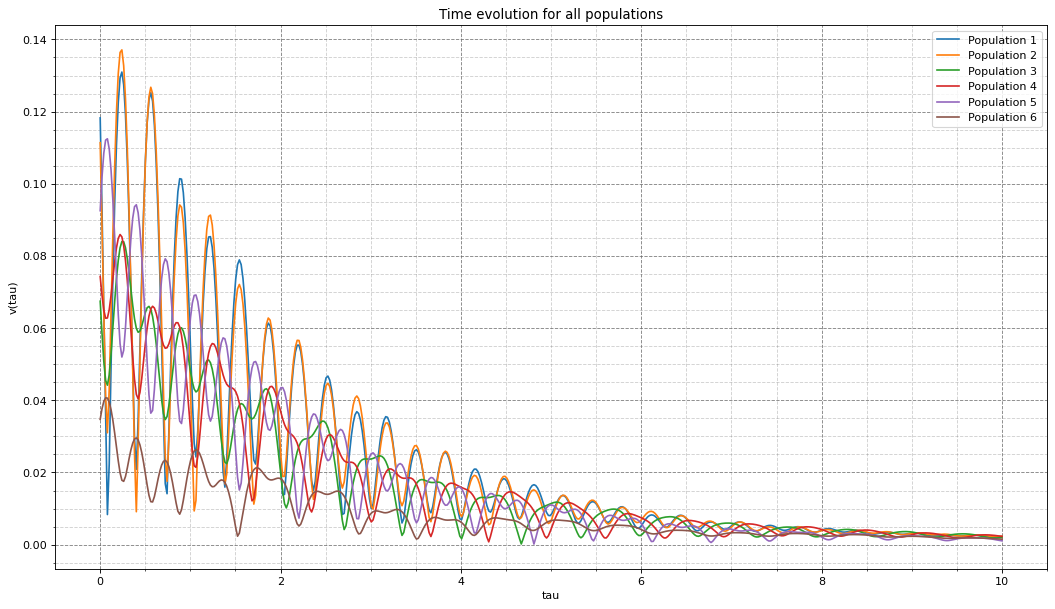

In [8]:
# Now, plotting the time evolution for all populations
plt.figure(figsize=(16, 9), dpi=80)
for i in range(6):
    plt.plot(tau, v_evo[:,i], label="Population "+ str(i+1))
plt.xlabel("tau")
plt.ylabel('v(tau)')
plt.title('Time evolution for all populations')
plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.8)
plt.grid(b=True, which='minor', color='#666666', linestyle='--', alpha = 0.3)
plt.minorticks_on()
plt.legend()